# Failure Analysis
This page aims to determine the characteristics of a failing hand to improve our greedy heuristic.

In [91]:
'''
Setting up variables
'''

from matplotlib import pyplot
from collections import Counter
import numpy as np
from data import f_hands


# Use all hands as a reference
r_hands = []
with open('../assets/starting_letters_x1000.txt', 'r') as file:
    r_hands += [line.replace('\n', '') for line in file.readlines()]
    
# Define list containing the alphabet
alphabet = [chr(i) for i in range(65, 91)]

# Determine character frequency for each hand
f_freqs = [Counter(hand) for _, hand in f_hands]
r_freqs = [Counter(hand) for hand in r_hands]

# Determine total character frequency
f_total_freq = sum(f_freqs, Counter())
r_total_freq = sum(r_freqs, Counter())

Original notes:
> Some things that seem to occur:
> - Q and no U or I
> - 2 of either Q, X, Z, J, V
>     - In this case, rather than dumping the 'worst' letter, dump the duplicate nasty letter
> - Very few vowels, or very low variety of vowels
> 
> It would be cool to run a thing that sees what proportion of the failed starting hads fit within the above rules.

#### Evaluating the frequency of each individual character in an average hand

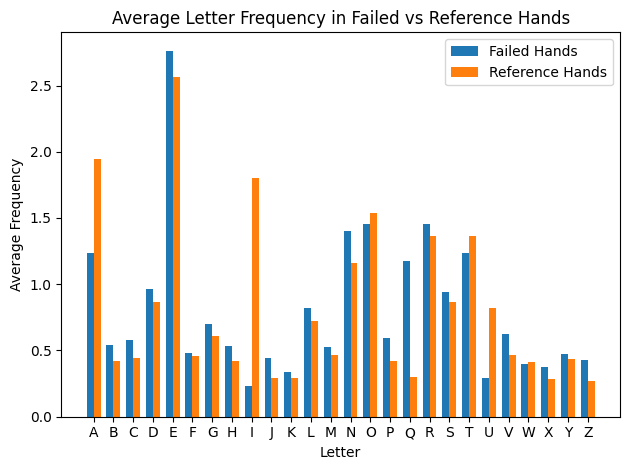

In [92]:
# Determine the frequency of each letter in an average hand
f_avg_freq = [f_total_freq.get(letter, 0) / len(f_freqs) for letter in alphabet]
r_avg_freq = [r_total_freq.get(letter, 0) / len(r_freqs) for letter in alphabet]

fig, ax = pyplot.subplots()
index = np.arange(len(alphabet))
bar_width = 0.35

bar1 = ax.bar(index, f_avg_freq, bar_width, label='Failed Hands')
bar2 = ax.bar(index + bar_width, r_avg_freq, bar_width, label='Reference Hands')

ax.set_xlabel('Letter')
ax.set_ylabel('Average Frequency')
ax.set_title('Average Letter Frequency in Failed vs Reference Hands')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(alphabet)
ax.legend()

pyplot.tight_layout()
pyplot.show()

Note that '**Q**' appears more often while '**U**' and '**I**' appear less often in a unsuccessful hand versus the average hand. Aside from that, '**A**' also appears noticably less often, and finally, the other characters have similar frequencies.

#### Evaluating the proportion of hands with '**Q**' but no '**U**' nor '**I**'

In [93]:
f_count = Counter(['Q' in freq and 'U' not in freq and 'I' not in freq for freq in f_freqs])
r_count = Counter(['Q' in freq and 'U' not in freq and 'I' not in freq for freq in r_freqs])

def proportion(d):
    return d.get(True, 0) / (d.get(True, 0) + d.get(False, 0))

print(f'{proportion(f_count):.0%} of failed hands')
print(f'{proportion(r_count):.0%} of reference hands')

58% of failed hands
1% of reference hands


#### Evaluating the proportion of hands with duplicates of an uncommon letter

In [94]:

uncommon_letters = set('QXZJV')

f_count = Counter(any(freq[letter] >= 2 for letter in uncommon_letters) for freq in f_freqs)
r_count = Counter(any(freq[letter] >= 2 for letter in uncommon_letters) for freq in r_freqs)

print('Proportion of hands with duplicates of any uncommon letter:')
print(f'{proportion(f_count):.0%} of failed hands')
print(f'{proportion(r_count):.0%} of reference hands')

Proportion of hands with duplicates of any uncommon letter:
46% of failed hands
14% of reference hands


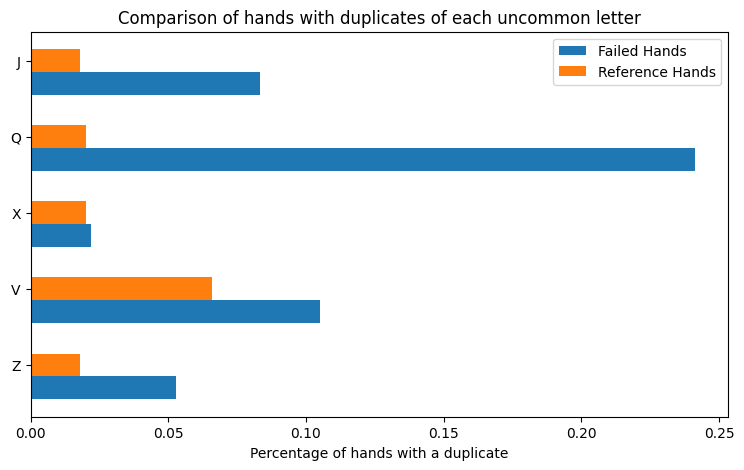

In [95]:
categories = list(uncommon_letters)

# Determine frequency of each duplicate
f_dupe_freq = [
    proportion(Counter(freq.get(letter, 0) >= 2 for freq in f_freqs)) 
    for letter in uncommon_letters
]
r_dupe_freq = [
    proportion(Counter(freq.get(letter, 0) >= 2 for freq in r_freqs))
    for letter in uncommon_letters
]

# Feed data into plot
ind = range(len(categories))
pyplot.figure(figsize=(9, 5))
width = 0.3
pyplot.barh([p - width for p in ind], f_dupe_freq, width, label='Failed Hands')
pyplot.barh([p for p in ind], r_dupe_freq, width, label='Reference Hands')

# Decorate plot
pyplot.xlabel('Percentage of hands with a duplicate')
pyplot.title('Comparison of hands with duplicates of each uncommon letter')
pyplot.yticks(ind, categories)
pyplot.legend()

pyplot.show()

#### Distribution of of vowels in each hand

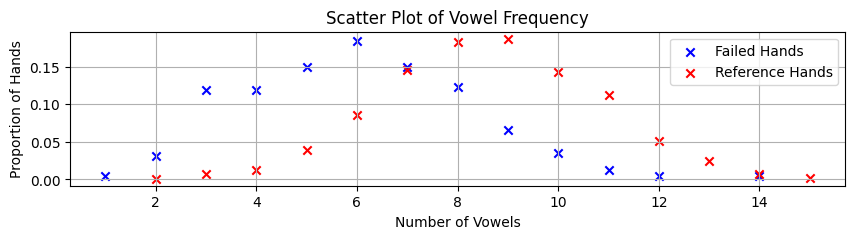

In [96]:
vowels = set('AEIOU')

def normalized(counter):
    total = sum(counter.values())
    return {key: value / total for key, value in counter.items()}

f_vowel_distribution = normalized(Counter(sum(freq.get(letter, 0) for letter in vowels) for freq in f_freqs))
r_vowel_distribution = normalized(Counter(sum(freq.get(letter, 0) for letter in vowels) for freq in r_freqs))

# Extract keys and values
x1, y1 = zip(*f_vowel_distribution.items())
x2, y2 = zip(*r_vowel_distribution.items())

pyplot.figure(figsize=(10, 2))
pyplot.scatter(x1, y1, color='blue', label='Failed Hands', marker='x')
pyplot.scatter(x2, y2, color='red', label='Reference Hands', marker='x')
pyplot.title('Scatter Plot of Vowel Frequency')
pyplot.xlabel('Number of Vowels')
pyplot.ylabel('Proportion of Hands')
pyplot.legend()
pyplot.grid(True)
pyplot.show()

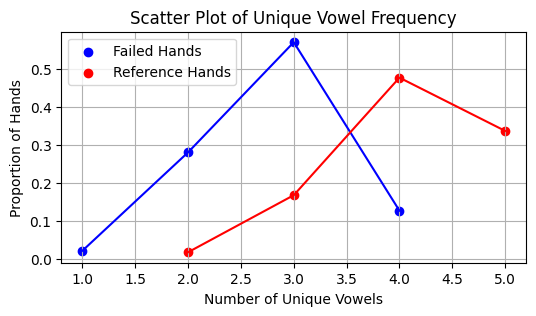

In [97]:
f_unique_vowel_distribution = normalized(Counter(len(vowels.intersection(freq)) for freq in f_freqs))
r_unique_vowel_distribution = normalized(Counter(len(vowels.intersection(freq)) for freq in r_freqs))

x1, y1 = zip(*sorted(f_unique_vowel_distribution.items()))
x2, y2 = zip(*sorted(r_unique_vowel_distribution.items()))

pyplot.figure(figsize=(6, 3))
pyplot.scatter(x1, y1, color='blue', label='Failed Hands')
pyplot.scatter(x2, y2, color='red', label='Reference Hands')
pyplot.plot(x1, y1, 'b')
pyplot.plot(x2, y2, 'r')

pyplot.title('Scatter Plot of Unique Vowel Frequency')
pyplot.xlabel('Number of Unique Vowels')
pyplot.ylabel('Proportion of Hands')
pyplot.legend()
pyplot.grid(True)
pyplot.show()